In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fitlib
import mplhep
mplhep.style.use(mplhep.style.LHCb2)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
Dp_M = np.fromfile('data/Dp_M_cut')

In [5]:
gauss = fitlib.Fitter.binned(Dp_M, bins=200, range=(1840,2040))
mu = fitlib.f(1840,1900)
mu2 = fitlib.f(1900,2040)
gauss.pdf = [fitlib.Normal(mu=mu), fitlib.Normal(mu=mu), fitlib.Normal(mu=mu2), fitlib.Normal(mu=mu2), fitlib.Exp(x0=fitlib.f(1840), a=fitlib.f(1,300))]
gauss.chi2()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2871                       │             Nfcn = 1379              │
│ EDM = 1.67e-06 (Goal: 0.0002)    │            time = 0.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.572e6  │  0.019e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.869673e3 │0.000006e3 │            │            │  1840   │  1900   │       │
│ 2 │ x2   │   7.68    │   0.05    │            │            │    0    │         │       │
│ 3 │ x3   │  0.657e6  │  0.020e6  │            │            │    1    │         │       │
│ 4 │ x4   │   5.13    │   0.04    │            │            │    0    │         │       │
│ 5 │ x5   │   403e3   │   10e3    │            │            │    1    │         │       │
│ 6 │ x6   │1.968575e3 │0.000005e3 │            │            │  1900   │  2040   │       │
│ 7 │ x7   │   10.67   │   0.06    │            │            │    0    │         │       │
│ 8 │ x8   │  1.658e6  │  0.010e6  │            │            │    1    │         │       │
│ 9 │ x9   │   6.173   │   0.014   │            │            │    0    │         │       │
│ 10│ x10  │  68.2e3   │   0.5e3   │            │            │    0    │         │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │   96.6    │    1.1    │            │            │    1    │   300   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    3.73e+08    3.285815   -969.3840      -0.4e9   -677.3244           0  804.280e-3     -32.790          -0     -4.4667      2.31e6           0   -4.9299e3 │
│  x1 │    3.285815    3.49e-05   -0.013e-3   -3.439061   -0.005e-3 -406.508e-3           0    0.003e-3  421.850e-3    0.001e-3   46.591e-3           0   -0.520e-3 │
│  x2 │   -969.3840   -0.013e-3     0.00271    978.8331      0.0017    -12.2980   -0.003e-3      0.0001     13.0893     0.02e-3     -7.9601      0.0000      0.0172 │
│  x3 │      -0.4e9   -3.439061    978.8331    3.79e+08    681.6262          -0 -835.339e-3      33.987           0     4.62994     -2.40e6           0    5.1242e3 │
│  x4 │   -677.3244   -0.005e-3      0.0017    681.6262     0.00133     -5.7643   -0.001e-3      0.0001      6.1337     0.01e-3     -3.6428      0.0000      0.0077 │
│  x5 │           0 -406.508e-3    -12.2980          -0     -5.7643    9.43e+07   10.735e-3    -598.759     -0.09e9  -126.73345      1.26e6           0    1.8938e3 │
│  x6 │  804.280e-3           0   -0.003e-3 -83

Text(0.05, 0.95, 'LHCb Preliminary')

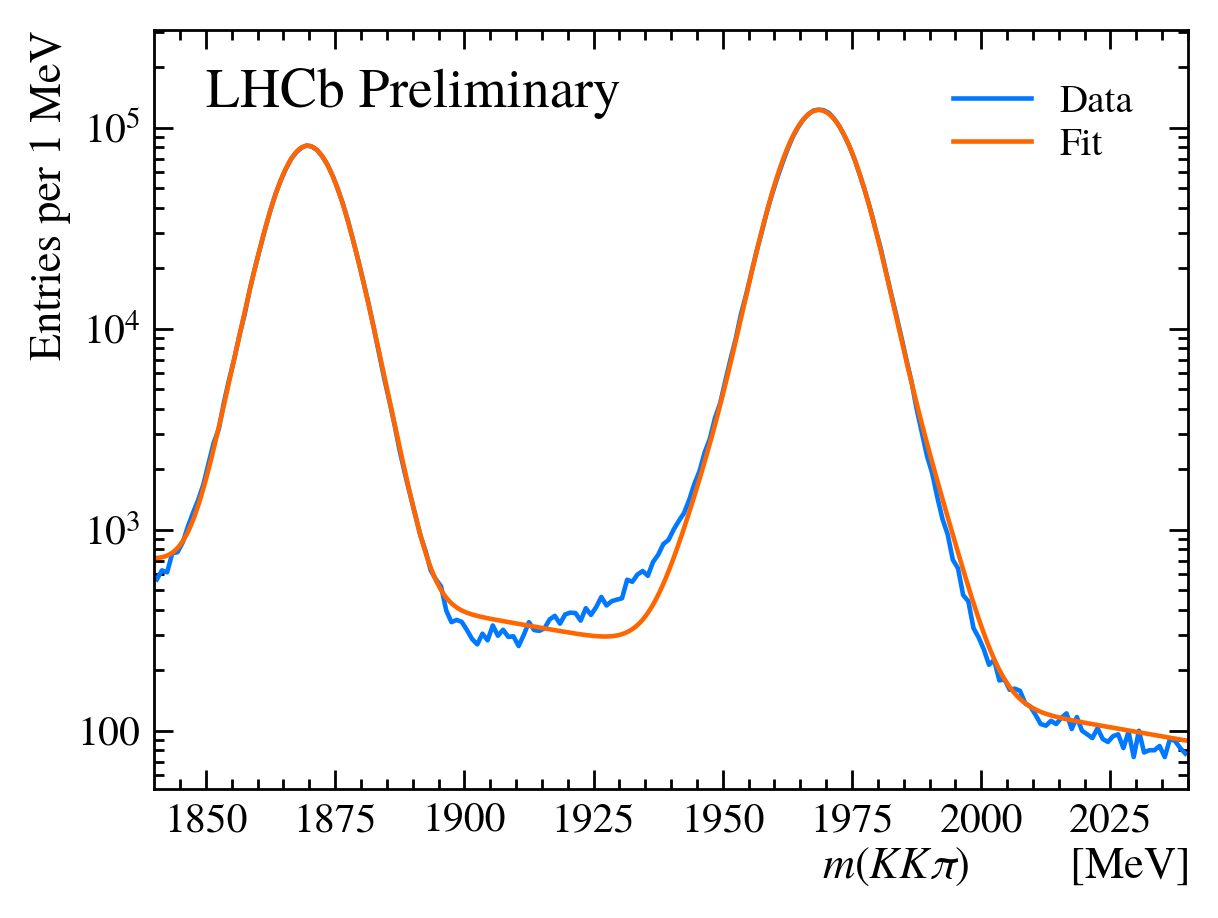

In [6]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(gauss.x,gauss.y, label="Data")
plt.plot(np.linspace(1840,2040,5000),gauss._pdf((np.linspace(1840,2040,5000))), label='Fit')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,None,np.max(gauss._pdf(gauss.x))*2.5])
plt.legend()
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

Text(0.05, 0.95, 'LHCb Preliminary')

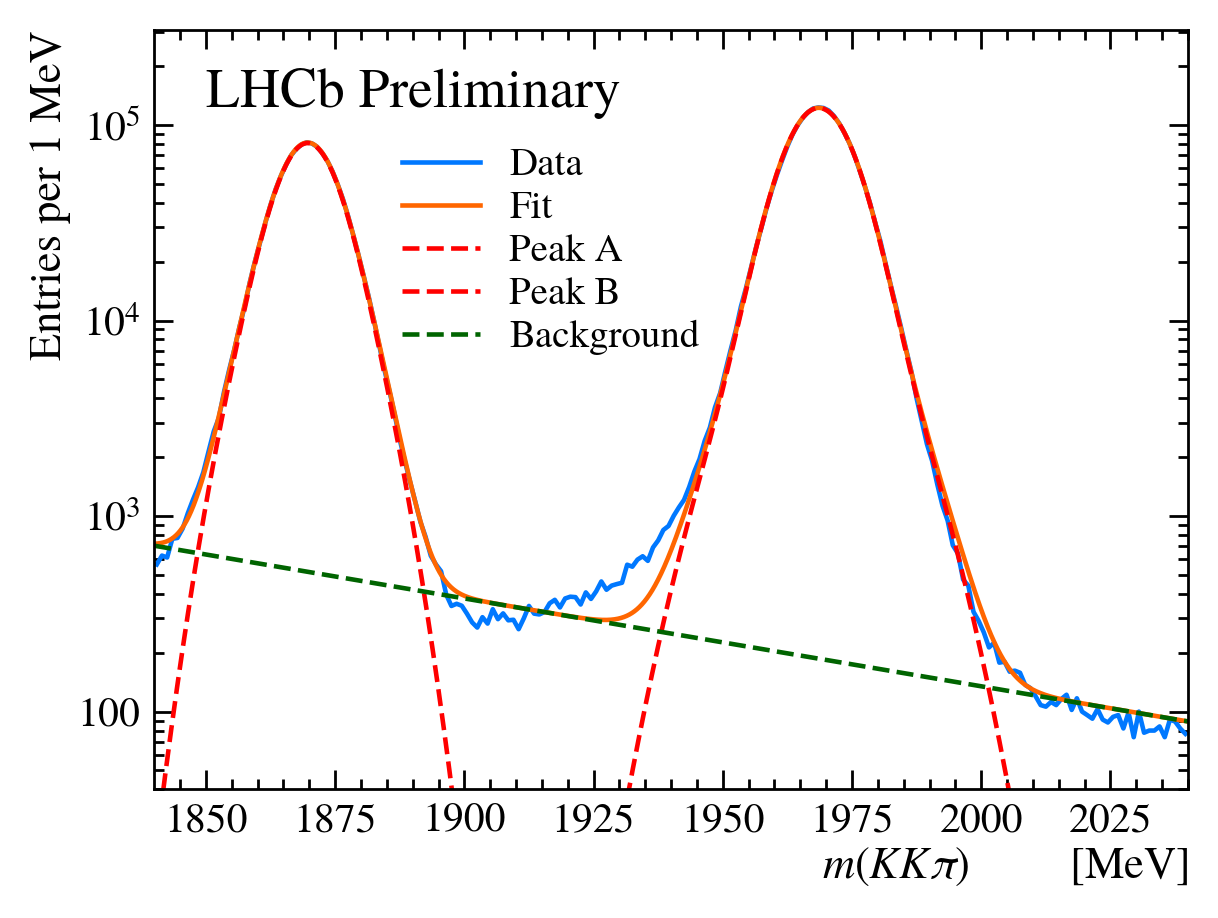

In [6]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(gauss.x,gauss.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,gauss._pdf(x), label='Fit')
plt.plot(x,gauss.pdf[0].call(x)+gauss.pdf[1].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,gauss.pdf[2].call(x)+gauss.pdf[3].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,gauss.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(gauss._pdf(gauss.x))*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

Text(0.05, 0.95, 'LHCb Preliminary')

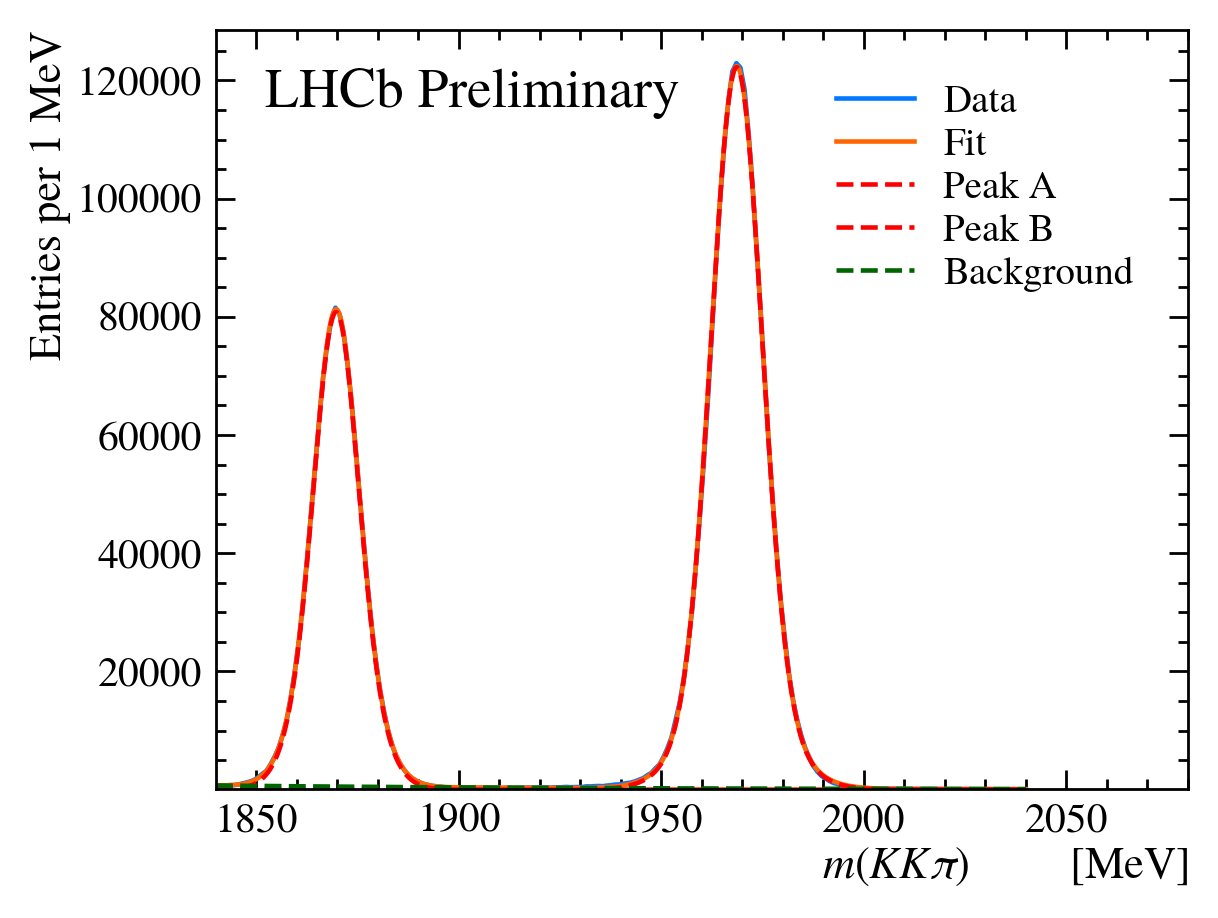

In [7]:
fig,ax = plt.subplots()
plt.plot(gauss.x,gauss.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,gauss._pdf(x), label='Fit')
plt.plot(x,gauss.pdf[0].call(x)+gauss.pdf[1].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,gauss.pdf[2].call(x)+gauss.pdf[3].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,gauss.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2080,40,np.max(gauss._pdf(gauss.x))*1.05])
plt.legend(loc='upper right')
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [8]:
tanh_dp = fitlib.Convolution([0], 1869.65, 1)
Dp_data = np.loadtxt("./data/Dp_histogram.csv", delimiter=",", skiprows=1)
tanh_dp.d_x = Dp_data[:, 0]
tanh_dp.c = Dp_data[:, 1]

In [9]:
tanh_ds = fitlib.Convolution([0], 1968.33, 1)
Ds_data = np.loadtxt("./data/Ds_histogram.csv", delimiter=",", skiprows=1)
tanh_ds.d_x = Ds_data[:, 0]
tanh_ds.c = Ds_data[:, 1]

In [10]:
import numba

In [11]:
conv1 = fitlib.Fitter.binned(Dp_M,200, range=(1840,2040))
conv1.mu2 = fitlib.f(1950,2000)
conv1.mu_diff = fitlib.f(0,200)
conv1.pdf = [
    tanh_dp.pdf(mu=conv1.mu2 - conv1.mu_diff),tanh_dp.pdf(mu=conv1.mu2 - conv1.mu_diff),
    tanh_ds.pdf(mu=conv1.mu2), tanh_ds.pdf(mu=conv1.mu2),
    fitlib.Exp(x0=1840)
]
conv1.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 533.3                      │             Nfcn = 1876              │
│ EDM = 0.000139 (Goal: 0.0002)    │           time = 30.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.863e6  │  0.016e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.968699e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 2 │ x2   │  98.938   │   0.008   │            │            │    0    │   200   │       │
│ 3 │ x3   │   5.410   │   0.027   │            │            │    0    │         │       │
│ 4 │ x4   │  0.381e6  │  0.015e6  │            │            │    1    │         │       │
│ 5 │ x5   │   8.47    │   0.08    │            │            │    0    │         │       │
│ 6 │ x6   │  0.449e6  │  0.013e6  │            │            │    1    │         │       │
│ 7 │ x7   │   10.05   │   0.07    │            │            │    0    │         │       │
│ 8 │ x8   │  1.633e6  │  0.013e6  │            │            │    1    │         │       │
│ 9 │ x9   │   6.101   │   0.017   │            │            │    0    │         │       │
│ 10│ x10  │   65e3    │    4e3    │            │            │    0    │         │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │    420    │    40     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    2.46e+08   -1.124082   463.39e-3    408.1910     -0.24e9  1.158527e3     -0.01e9      77.988      0.01e9    12.81456     0.023e9           0     256.4e3 │
│  x1 │   -1.124082    2.46e-05    0.025e-3   -0.002e-3    1.074581   -0.007e-3  441.406e-3   -0.005e-3 -470.464e-3          -0 -774.464e-3           0   -8.222e-3 │
│  x2 │   463.39e-3    0.025e-3    5.92e-05           0  -457.70e-3           0   293.83e-3          -0  -289.28e-3          -0   254.32e-3           0     2.37e-3 │
│  x3 │    408.1910   -0.002e-3           0    0.000736   -405.0239      1.8e-3    -16.8866      0.1e-3     18.0435     0.02e-3     32.5278           0    368.7e-3 │
│  x4 │     -0.24e9    1.074581  -457.70e-3   -405.0239    2.41e+08 -1.145516e3      0.01e9     -74.831     -0.01e9   -12.29737    -0.022e9           0    -245.3e3 │
│  x5 │  1.158527e3   -0.007e-3           0      1.8e-3 -1.145516e3     0.00582     -68.925       0.000      73.729     0.08e-3     134.827       0.000       1.525 │
│  x6 │     -0.01e9  441.406e-3   293.83e-3    

Text(0.05, 0.95, 'LHCb Preliminary')

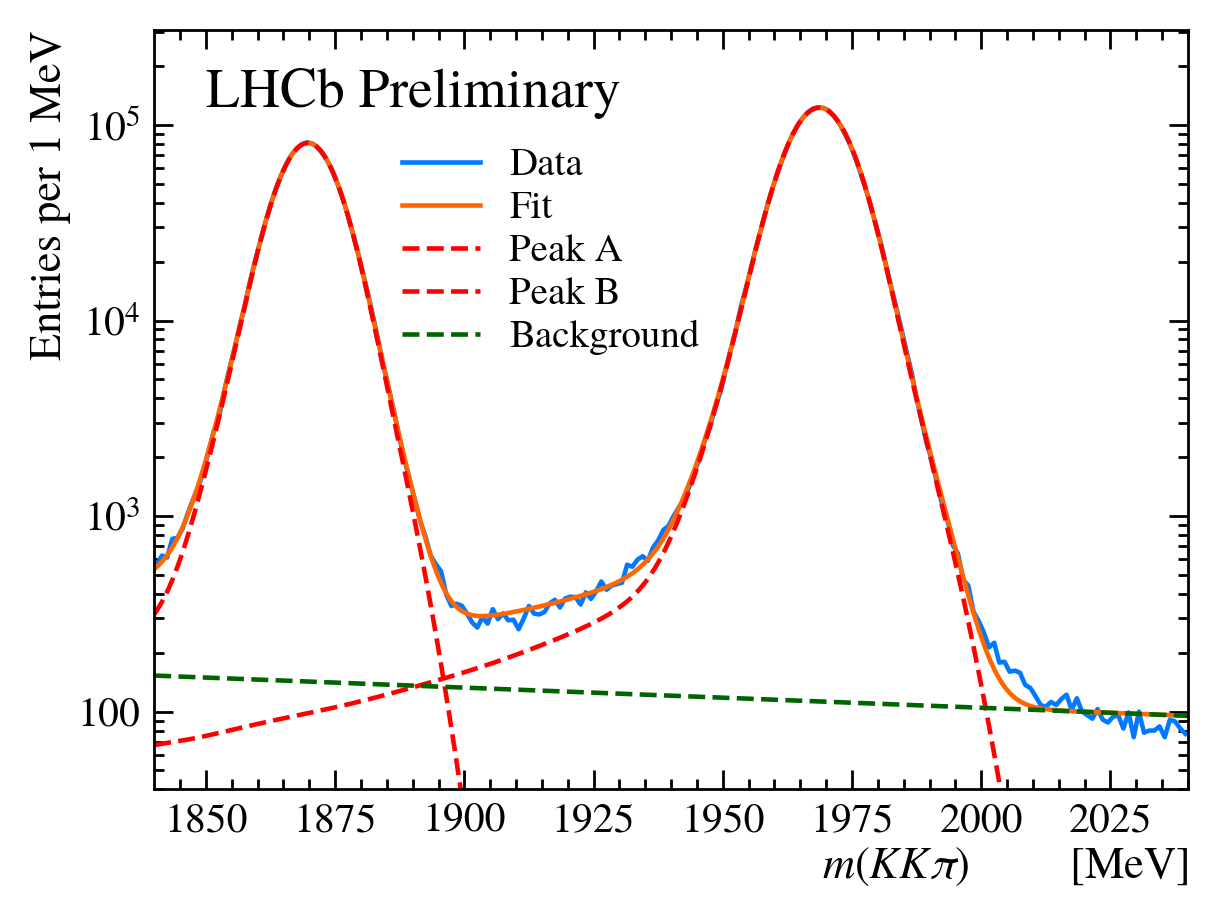

In [12]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(conv1.x,conv1.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,conv1._pdf(x), label='Fit')
plt.plot(x,conv1.pdf[0].call(x)+conv1.pdf[1].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,conv1.pdf[2].call(x)+conv1.pdf[3].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,conv1.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(gauss._pdf(gauss.x))*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [29]:
na = conv1.values()[2]['n']
nb = conv1.values()[3]['n']
nab = na + nb
sa = conv1.values()[2]['sigma']
sb = conv1.values()[3]['sigma']

np.sqrt( sa**2*na/nab + sb**2*nb/nab )/ np.sqrt(nab)

0.004948082986858791

In [32]:
np.sqrt( (sa**2*na/nab + sb**2*nb/nab)/nab + 0.07**2)

0.07017466441134465

In [24]:
conv1.errors()

[{'n': 15689.449348240567,
  'mu': [0.004956909686143263, 0.007691785005050633],
  'sigma': 0.027126468065659104},
 {'n': 15536.210341201338,
  'mu': [0.004956909686143263, 0.007691785005050633],
  'sigma': 0.07627327183641963},
 {'n': 13185.221132932085,
  'mu': 0.004956909686143263,
  'sigma': 0.06724215429845959},
 {'n': 13290.00607194344,
  'mu': 0.004956909686143263,
  'sigma': 0.016647689617435013},
 {'n': 4471.363950331932, 'x0': 18.400000000000002, 'a': 44.23745184466068}]

In [87]:
import scipy
def ExpQ(n=(0,1,np.inf), x0=(-np.inf,np.inf), a=(0,1,np.inf), b=(0,1,np.inf)):
    return fitlib.Fit_function(lambda x,n,x0,a,b: n*scipy.stats.expon.pdf(x,x0,a*x+b), [n,x0,a,b])

In [88]:
conv2 = fitlib.Fitter.binned(Dp_M,200, range=(1840,2040))
conv2.mu2 = fitlib.f(1950,2000)
conv2.mu_diff = fitlib.f(0,200)
conv2.pdf = [
    tanh_dp.pdf(mu=conv2.mu2 - conv2.mu_diff),tanh_dp.pdf(mu=conv2.mu2 - conv2.mu_diff),
    tanh_ds.pdf(mu=conv2.mu2), tanh_ds.pdf(mu=conv2.mu2),
    ExpQ(n=fitlib.f(30000,90000), x0=1840, a=fitlib.f(-500,0,500), b=fitlib.f(0,5000) )
]
conv2.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 445.6                      │             Nfcn = 2643              │
│ EDM = 0.000103 (Goal: 0.0002)    │           time = 41.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.353e6  │  0.013e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.968698e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 2 │ x2   │  98.940   │   0.008   │            │            │    0    │   200   │       │
│ 3 │ x3   │   8.66    │   0.07    │            │            │    0    │         │       │
│ 4 │ x4   │  0.893e6  │  0.013e6  │            │            │    1    │         │       │
│ 5 │ x5   │   5.452   │   0.023   │            │            │    0    │         │       │
│ 6 │ x6   │  1.588e6  │  0.014e6  │            │            │    1    │         │       │
│ 7 │ x7   │   6.054   │   0.017   │            │            │    0    │         │       │
│ 8 │ x8   │  0.493e6  │  0.014e6  │            │            │    1    │         │       │
│ 9 │ x9   │   9.79    │   0.06    │            │            │    0    │         │       │
│ 10│ x10  │  56.4e3   │   1.0e3   │            │            │  30000  │  90000  │       │
│ 11│ x11  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 12│ x12  │   -2.15   │   0.11    │            │            │  -500   │   500   │       │
│ 13│ x13  │  4.48e3   │  0.22e3   │            │            │    0    │  5000   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │         x0         x1         x2         x3         x4         x5         x6         x7         x8         x9        x10        x11        x12        x13 │
├─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │   1.64e+08   3.964192    5.64705   -841.421    -0.17e9  -281.6923          0    2.27538          0     -9.414      0.6e6          0    261.969    -0.53e6 │
│  x1 │   3.964192   2.47e-05   0.025e-3  -0.024e-3  -4.048055  -0.006e-3  -1.026043         -0 795.042e-3  -0.010e-3 -91.572e-3          0   0.044e-3 -89.332e-3 │
│  x2 │    5.64705   0.025e-3   5.98e-05   -0.03e-3   -5.66248   -0.01e-3   -1.93894         -0    1.54627   -0.02e-3   -9.01e-3          0    0.05e-3  -97.32e-3 │
│  x3 │   -841.421  -0.024e-3   -0.03e-3    0.00466    851.503     1.4e-3      9.463         -0     -8.875      0.000     -2.376      0.000     -0.002      4.104 │
│  x4 │    -0.17e9  -4.048055   -5.66248    851.503   1.68e+08   284.0141          0   -1.87018         -0     11.447     -0.6e6          0   -279.189     0.56e6 │
│  x5 │  -281.6923  -0.006e-3   -0.01e-3     1.4e-3   284.0141   0.000535    -2.2974   -0.01e-3     1.8366          0  -973.7e-3          

Text(0.05, 0.95, 'LHCb Preliminary')

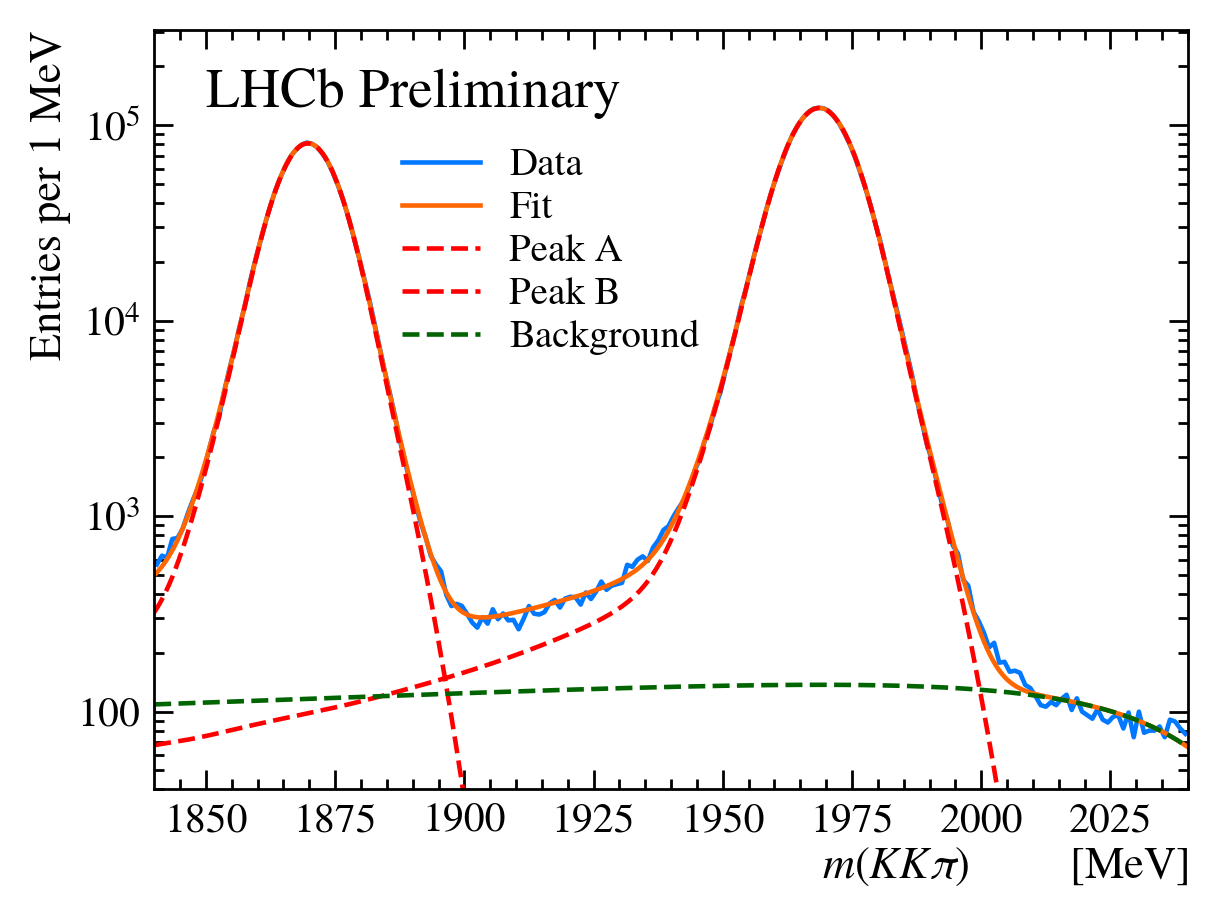

In [89]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(conv2.x,conv2.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,conv2._pdf(x), label='Fit')
plt.plot(x,conv2.pdf[0].call(x)+conv2.pdf[1].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,conv2.pdf[2].call(x)+conv2.pdf[3].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,conv2.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(conv2.y)*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

Text(0.05, 0.95, 'LHCb Preliminary')

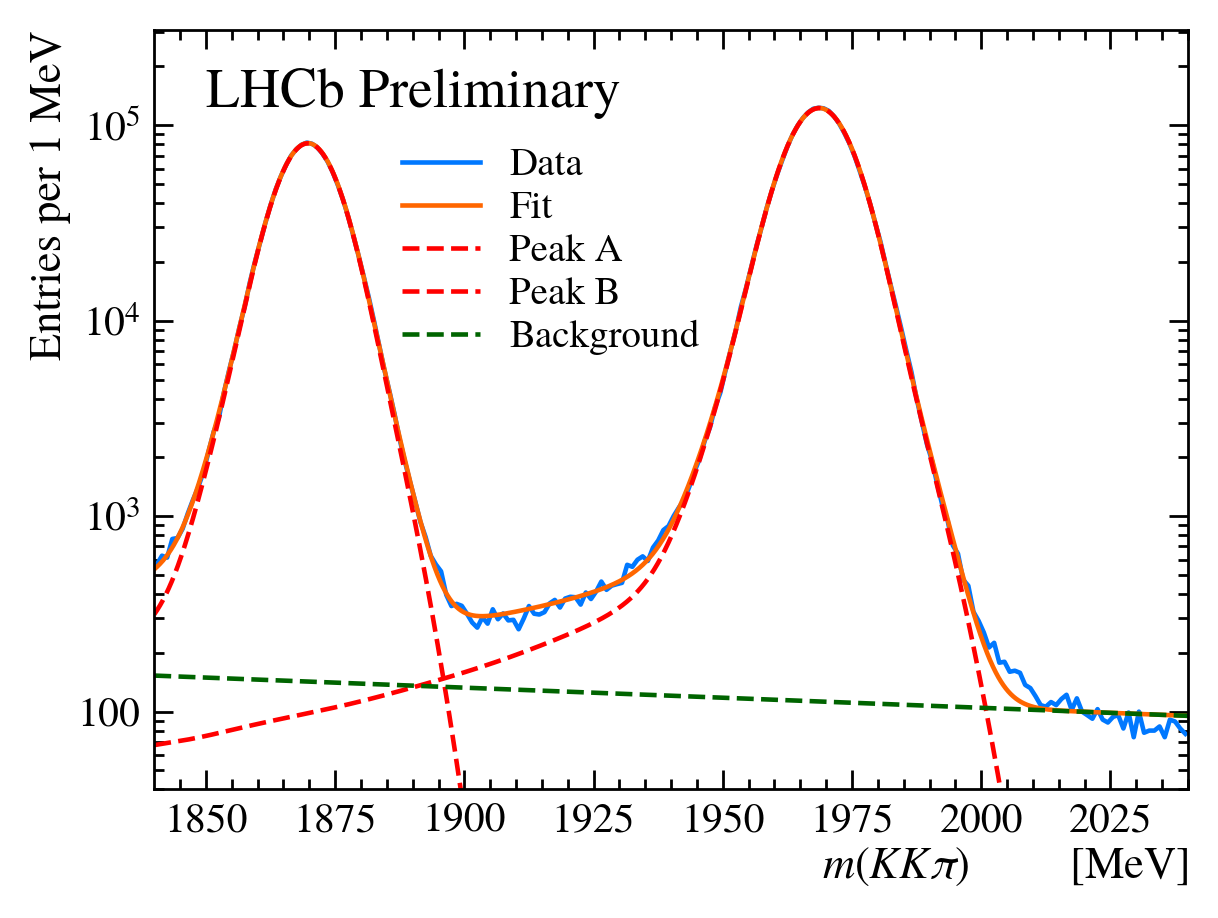

In [49]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(conv2.x,conv2.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,conv2._pdf(x), label='Fit')
plt.plot(x,conv2.pdf[0].call(x)+conv2.pdf[1].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,conv2.pdf[2].call(x)+conv2.pdf[3].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,conv2.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(conv2.y)*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [91]:
def ExpE(n=(0,1,np.inf), x0=(-np.inf,np.inf), a=(0,1,np.inf), b=(0,1,np.inf)):
    return fitlib.Fit_function(lambda x,n,x0,a,b: n * np.e**(-a*np.exp(b*(x-x0))), [n,x0,a,b])

In [107]:
conv3 = fitlib.Fitter.binned(Dp_M,200, range=(1840,2040))
conv3.mu2 = fitlib.f(1950,2000)
conv3.mu_diff = fitlib.f(0,200)
conv3.pdf = [
    tanh_dp.pdf(mu=conv3.mu2 - conv3.mu_diff),tanh_dp.pdf(mu=conv3.mu2 - conv3.mu_diff),
    tanh_ds.pdf(mu=conv3.mu2), tanh_ds.pdf(mu=conv3.mu2),
    fitlib.Fit_function(lambda x,n,x0,a,b: n*scipy.stats.gamma.pdf(x, a, scale=b, loc=x0), 
                        [fitlib.f(0,1,np.inf),fitlib.f(1820,1839),fitlib.f(0,0.5,1),fitlib.f(0,100,np.inf)])
]
conv3.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 533.3                      │             Nfcn = 3239              │
│ EDM = 9.1e-05 (Goal: 0.0002)     │           time = 50.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.381e6  │  0.015e6  │            │            │    1    │         │       │
│ 1 │ x1   │1.968699e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 2 │ x2   │  98.938   │   0.008   │            │            │    0    │   200   │       │
│ 3 │ x3   │   8.47    │   0.07    │            │            │    0    │         │       │
│ 4 │ x4   │  0.863e6  │  0.015e6  │            │            │    1    │         │       │
│ 5 │ x5   │   5.410   │   0.027   │            │            │    0    │         │       │
│ 6 │ x6   │  0.449e6  │  0.013e6  │            │            │    1    │         │       │
│ 7 │ x7   │   10.05   │   0.07    │            │            │    0    │         │       │
│ 8 │ x8   │  1.633e6  │  0.013e6  │            │            │    1    │         │       │
│ 9 │ x9   │   6.101   │   0.016   │            │            │    0    │         │       │
│ 10│ x10  │  67.0e3   │   1.1e3   │            │            │    0    │         │       │
│ 11│ x11  │  1.824e3  │  0.015e3  │            │            │  1820   │  1839   │       │
│ 12│ x12  │   1.000   │   0.017   │            │            │    0    │    1    │       │
│ 13│ x13  │    420    │    40     │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │            x0            x1            x2            x3            x4            x5            x6            x7            x8            x9           x10           x11           x12           x13 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │      2.29e+08    235.851e-3      -1.28871   -1.035978e3       -0.23e9     -387.5749        0.02e9      -108.542       -0.02e9     -23.11343        -4.2e6      -102.8e3 -306.90567e-3      -228.9e3 │
│  x1 │    235.851e-3      2.46e-05      0.025e-3     -0.002e-3   -267.949e-3            -0    768.907e-3     -0.007e-3   -795.642e-3     -0.001e-3   -101.790e-3     -4.089e-3      -0.01e-6     -7.176e-3 │
│  x2 │      -1.28871      0.025e-3      6.01e-05       0.01e-3       1.35633             0    -340.09e-3            -0     268.59e-3             0    -121.06e-3       2.10e-3       0.01e-6       3.68e-3 │
│  x3 │   -1.035978e3     -0.002e-3       0.01e-3       0.00507    1.048354e3        1.7e-3      -110.296         0.001       116.894       0.14e-3        18.316         0.688       1.86e-6         1.417 │
│  x4 │ 

Text(0.05, 0.95, 'LHCb Preliminary')

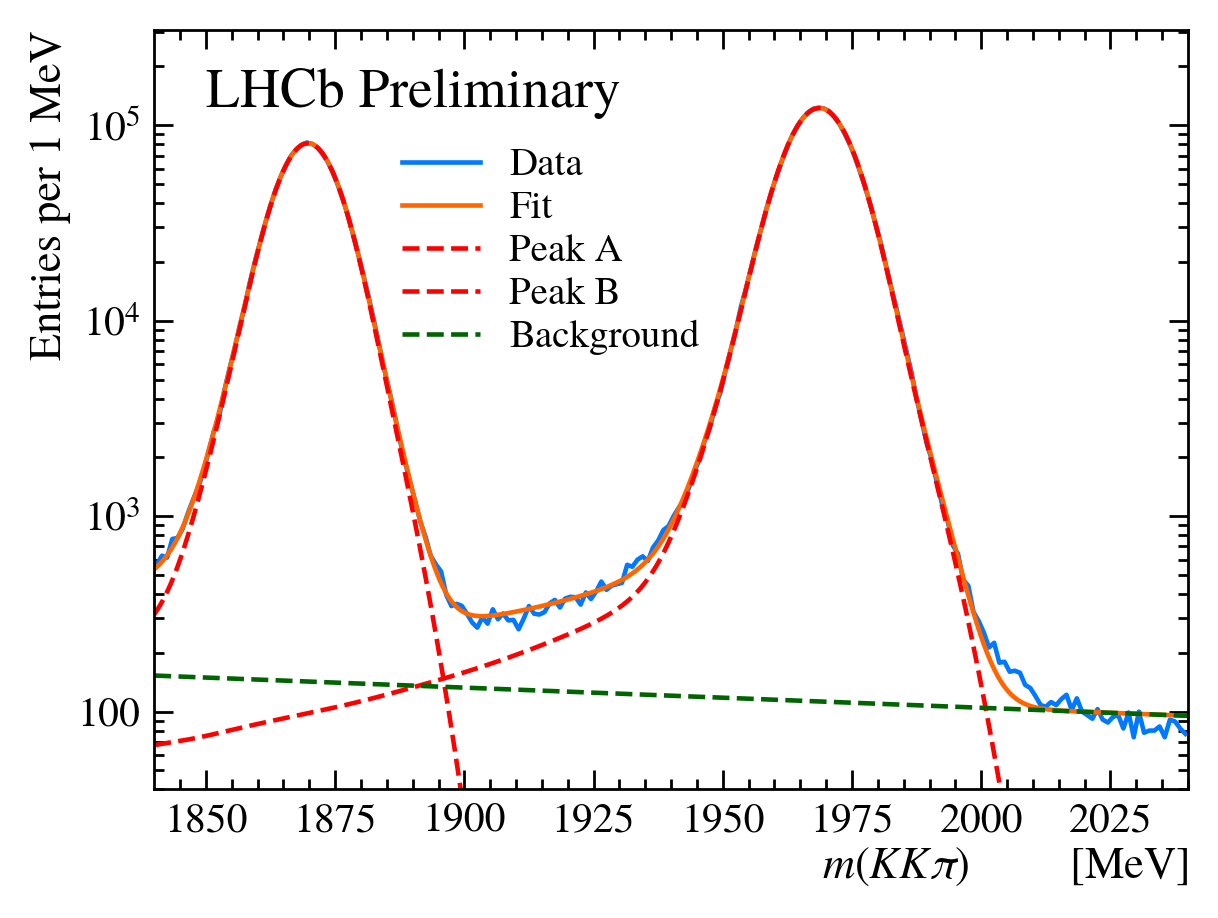

In [108]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(conv3.x,conv3.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,conv3._pdf(x), label='Fit')
plt.plot(x,conv3.pdf[0].call(x)+conv3.pdf[1].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,conv3.pdf[2].call(x)+conv3.pdf[3].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,conv3.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(conv3.y)*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [110]:
conv1_2 = fitlib.Fitter.binned(Dp_M,200, range=(1840,2040))
conv1_2.mu2 = fitlib.f(1950,2000)
conv1_2.mu_diff = fitlib.f(0,200)
conv1_2.pdf = [
    tanh_dp.pdf(mu=conv1_2.mu2 - conv1_2.mu_diff),tanh_dp.pdf(mu=conv1_2.mu2 - conv1_2.mu_diff),tanh_dp.pdf(mu=conv1_2.mu2 - conv1_2.mu_diff),
    tanh_ds.pdf(mu=conv1_2.mu2), tanh_ds.pdf(mu=conv1_2.mu2), tanh_ds.pdf(mu=conv1_2.mu2),
    fitlib.Exp(x0=1840)
]
conv1_2.chi2(100000)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 253.7                      │             Nfcn = 6686              │
│ EDM = 2.98e-08 (Goal: 0.0002)    │           time = 154.3 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.39e6   │  0.21e6   │            │            │    1    │         │       │
│ 1 │ x1   │1.968699e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 2 │ x2   │  98.938   │   0.008   │            │            │    0    │   200   │       │
│ 3 │ x3   │   4.85    │   0.30    │            │            │    0    │         │       │
│ 4 │ x4   │  0.68e6   │  0.16e6   │            │            │    1    │         │       │
│ 5 │ x5   │    6.4    │    0.5    │            │            │    0    │         │       │
│ 6 │ x6   │  0.18e6   │  0.06e6   │            │            │    1    │         │       │
│ 7 │ x7   │    9.7    │    0.5    │            │            │    0    │         │       │
│ 8 │ x8   │  0.067e6  │  0.016e6  │            │            │    1    │         │       │
│ 9 │ x9   │   14.4    │    0.8    │            │            │    0    │         │       │
│ 10│ x10  │  1.12e6   │  0.10e6   │            │            │    1    │         │       │
│ 11│ x11  │   5.65    │   0.08    │            │            │    0    │         │       │
│ 12│ x12  │  0.90e6   │  0.08e6   │            │            │    1    │         │       │
│ 13│ x13  │   8.07    │   0.22    │            │            │    0    │         │       │
│ 14│ x14  │  0.071e6  │  0.010e6  │            │            │    0    │         │       │
│ 15│ x15  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 16│ x16  │  0.58e3   │  0.11e3   │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12         x13         x14         x15         x16 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    4.38e+10   -9.863909     7.92254  63.15456e3   -0.034e12  92.62030e3     -10.1e9  76.80168e3     -0.33e9   18.1608e3         2e9  1.203075e3        -1e9   3.88503e3      0.40e9           0     5.133e6 │
│  x1 │   -9.863909    2.46e-05    0.025e-3   -0.012e-3    5.133041   -0.027e-3    4.651886   -0.047e-3  394.783e-3   -0.028e-3   -3.748783   -0.003e-3    3.306949   -0.009e-3   -2.234997           0  -26.020e-3 │
│  x2 │     7.92254    0.025e-3    5.92e-05     0.01e-3    -5.73517     0.02e-3    -2.18316     0.02e-3  -2

Text(0.05, 0.95, 'LHCb Preliminary')

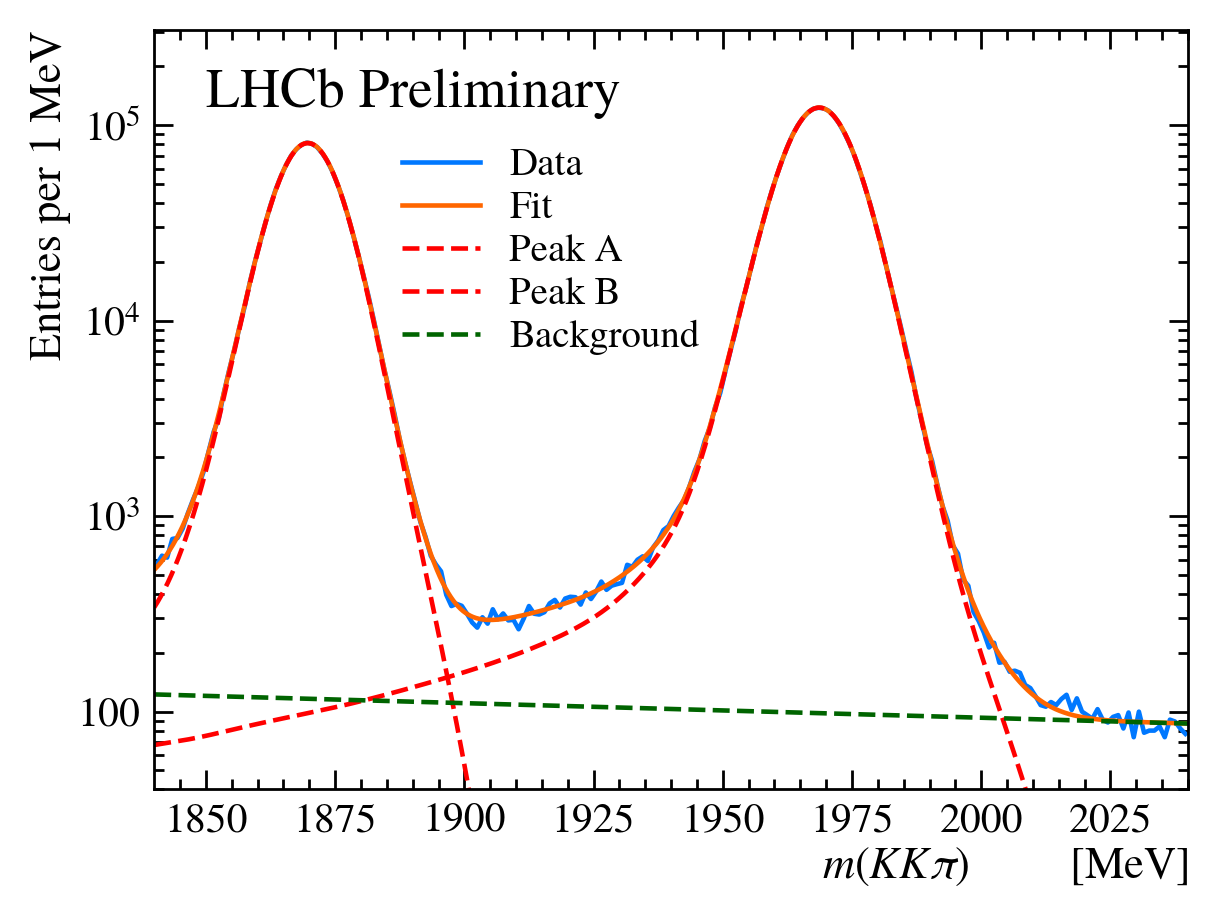

In [111]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(conv1_2.x,conv1_2.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,conv1_2._pdf(x), label='Fit')
plt.plot(x,conv1_2.pdf[0].call(x)+conv1_2.pdf[1].call(x)+conv1_2.pdf[2].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,conv1_2.pdf[3].call(x)+conv1_2.pdf[4].call(x)+conv1_2.pdf[5].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,conv1_2.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(conv1_2.y)*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [176]:
conv2_2 = fitlib.Fitter.binned(Dp_M,200, range=(1840,2040))
conv2_2.mu2 = fitlib.f(1950,1968.7, 2000)
conv2_2.mu_diff = fitlib.f(0,98.94, 200)
conv2_2.pdf = [
    tanh_dp.pdf(n=fitlib.f(0,400000,np.inf),mu=conv2_2.mu2 - conv2_2.mu_diff,sigma=fitlib.f(0,5,np.inf)),tanh_dp.pdf(n=fitlib.f(0,700000,np.inf),mu=conv2_2.mu2 - conv2_2.mu_diff,sigma=fitlib.f(0,6,np.inf)),tanh_dp.pdf(n=fitlib.f(0,200000,np.inf),mu=conv2_2.mu2 - conv2_2.mu_diff,sigma=fitlib.f(0,10,np.inf)),
    tanh_ds.pdf(n=fitlib.f(0,66000,np.inf),mu=conv2_2.mu2,sigma=fitlib.f(0,15,np.inf)), tanh_ds.pdf(n=fitlib.f(0,1000000,np.inf),mu=conv2_2.mu2,sigma=fitlib.f(0,5.6,np.inf)), tanh_ds.pdf(n=fitlib.f(0,900000,np.inf),mu=conv2_2.mu2,sigma=fitlib.f(0,8,np.inf)),
    ExpQ(n=fitlib.f(30000,90000), x0=1840, a=fitlib.f(-30,0,30), b=fitlib.f(0,4000,6000) )
]
conv2_2.chi2(99999)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 245.4                      │             Nfcn = 2327              │
│ EDM = 5.22e-05 (Goal: 0.0002)    │           time = 52.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.39e6   │  0.18e6   │            │            │    0    │         │       │
│ 1 │ x1   │1.968698e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 2 │ x2   │  98.940   │   0.008   │            │            │    0    │   200   │       │
│ 3 │ x3   │   4.85    │   0.27    │            │            │    0    │         │       │
│ 4 │ x4   │  0.69e6   │  0.14e6   │            │            │    0    │         │       │
│ 5 │ x5   │    6.4    │    0.4    │            │            │    0    │         │       │
│ 6 │ x6   │  0.17e6   │  0.05e6   │            │            │    0    │         │       │
│ 7 │ x7   │    9.8    │    0.4    │            │            │    0    │         │       │
│ 8 │ x8   │  0.119e6  │  0.028e6  │            │            │    0    │         │       │
│ 9 │ x9   │   12.6    │    0.5    │            │            │    0    │         │       │
│ 10│ x10  │  0.92e6   │  0.14e6   │            │            │    0    │         │       │
│ 11│ x11  │   5.49    │   0.12    │            │            │    0    │         │       │
│ 12│ x12  │  1.05e6   │  0.11e6   │            │            │    0    │         │       │
│ 13│ x13  │   7.60    │   0.24    │            │            │    0    │         │       │
│ 14│ x14  │  48.5e3   │   1.1e3   │            │            │  30000  │  90000  │       │
│ 15│ x15  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 16│ x16  │   -1.86   │   0.04    │            │            │   -30   │   30    │       │
│ 17│ x17  │  3.91e3   │  0.08e3   │            │            │    0    │  6000   │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │           x0           x1           x2           x3           x4           x5           x6           x7           x8           x9          x10          x11          x12          x13          x14          x15          x16          x17 │
├─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │     3.22e+10    -3.377877     -1.10383   47.39730e3    -0.025e12   67.26996e3       -7.0e9   58.15574e3       -0.5e9   11.78300e3     0.002e12   1.550836e3    -0.001e12    3.86361e3      -35.9e6            0     -55.1737        356e3 │
│  x1 │    -3.377877     2.46e-05     0.025e-3    -0.004e-3     1.850823    -0.009e-3     1.503106    -0.017e-

Text(0.05, 0.95, 'LHCb Preliminary')

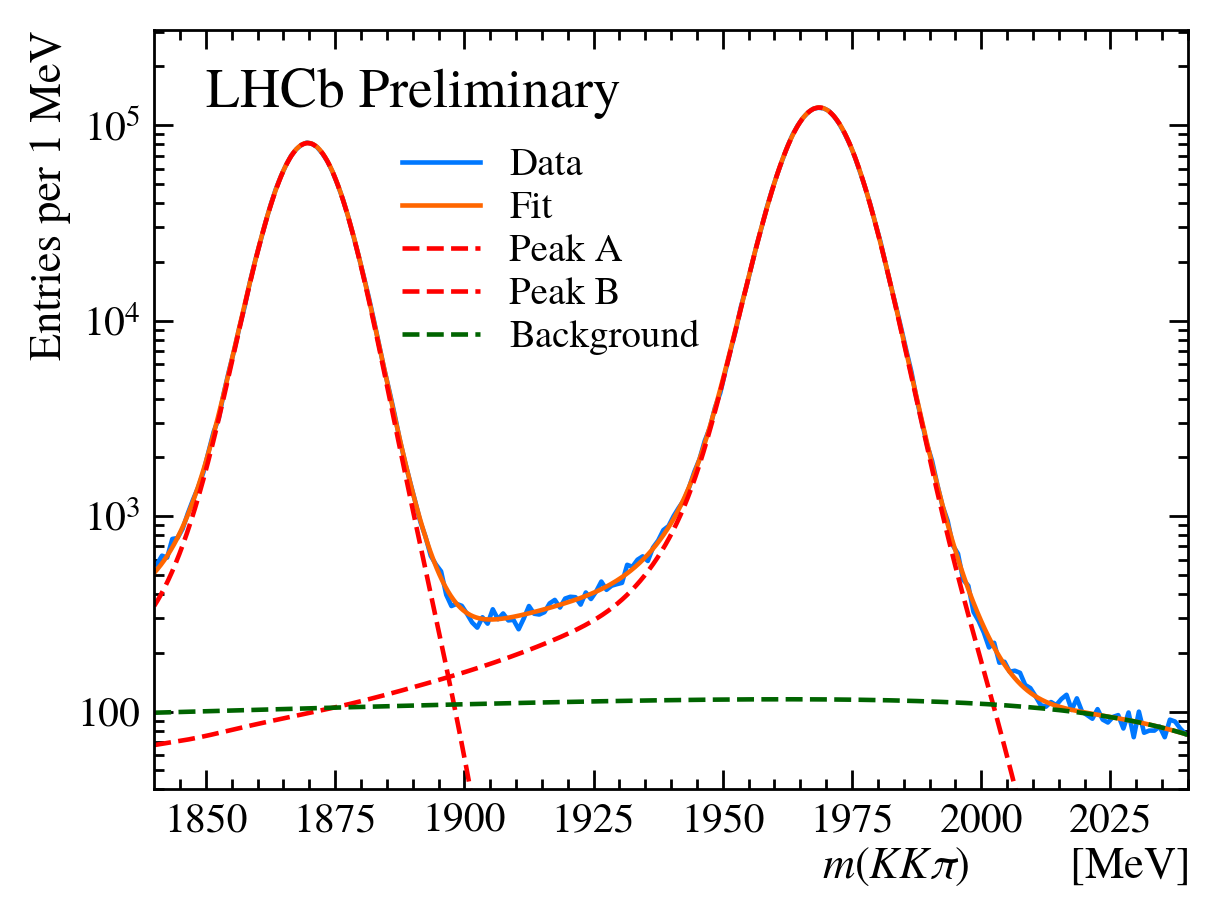

In [179]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(conv2_2.x,conv2_2.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,conv2_2._pdf(x), label='Fit')
plt.plot(x,conv2_2.pdf[0].call(x)+conv2_2.pdf[1].call(x)+conv2_2.pdf[2].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,conv2_2.pdf[3].call(x)+conv2_2.pdf[4].call(x)+conv2_2.pdf[5].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,conv2_2.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(conv1_2.y)*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [124]:
def crystalball_pdf(x, alpha, n, xbar, sigma):
    n_over_alpha = n/abs(alpha)
    exp = np.exp(-0.5*alpha ** 2)
    A = (n_over_alpha)**n*exp
    B =  n_over_alpha - abs(alpha)
    C = n_over_alpha/(n-1)*exp
    D = np.sqrt(0.5*np.pi)*(1 + scipy.special.erf(abs(alpha)/np.sqrt(2)))
    N = 1/(sigma*(C + D))

    mask = (x - xbar)/sigma > -alpha

    gaussian = N*np.exp(-0.5*((x[mask]-xbar)/sigma)**2)
    powerlaw = N*A*(B - (x[~mask]-xbar)/sigma)**-n

    result = np.zeros_like(x)
    result[mask] = gaussian
    result[~mask] = powerlaw
    
    return result

In [125]:
crys1 = fitlib.Fitter.binned(Dp_M, range=(1840,2040), bins=200)
crys1.mu2 = fitlib.f(1950,2000)
crys1.mu_diff = fitlib.f(0,100,200)

crys1.pdf=[
    fitlib.Fit_function(lambda x,N,a,n,mu,sigma: N*crystalball_pdf(x,a,n,mu,sigma), [fitlib.f(0,1,np.inf), fitlib.f(0,5), fitlib.f(0,2,np.inf), crys1.mu2 - crys1.mu_diff, fitlib.f(1,10)]),
    fitlib.Normal(mu = crys1.mu2 - crys1.mu_diff, sigma = fitlib.f(1,10)),
    
    fitlib.Fit_function(lambda x,N,a,n,mu,sigma: N*crystalball_pdf(x,a,n,mu,sigma), [fitlib.f(0,1,np.inf), fitlib.f(0,5), fitlib.f(0,2,np.inf), crys1.mu2, fitlib.f(1,10)]),
    fitlib.Normal(mu = crys1.mu2, sigma = fitlib.f(1,10)),
    
    fitlib.Exp(n=fitlib.f(0,10000,np.inf), x0=fitlib.f(1840), a=fitlib.f(0.0001,300,np.inf))
]

crys1.chi2(1000000)

/tmp/ipykernel_31824/1056269470.py:4: RuntimeWarning: overflow encountered in scalar power
  A = (n_over_alpha)**n*exp


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 625.6                      │             Nfcn = 2832              │
│ EDM = 2.38e-05 (Goal: 0.0002)    │            time = 1.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  0.457e6  │  0.017e6  │            │            │    0    │         │       │
│ 1 │ x1   │    3.6    │    0.6    │            │            │    0    │    5    │       │
│ 2 │ x2   │     0     │   1.2e3   │            │            │    0    │         │       │
│ 3 │ x3   │1.968600e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 4 │ x4   │  98.934   │   0.008   │            │            │    0    │   200   │       │
│ 5 │ x5   │   8.15    │   0.07    │            │            │    1    │   10    │       │
│ 6 │ x6   │  0.776e6  │  0.018e6  │            │            │    1    │         │       │
│ 7 │ x7   │   5.304   │   0.031   │            │            │    1    │   10    │       │
│ 8 │ x8   │  0.621e6  │  0.018e6  │            │            │    0    │         │       │
│ 9 │ x9   │   1.820   │   0.024   │            │            │    0    │    5    │       │
│ 10│ x10  │    5.9    │    0.5    │            │            │    0    │         │       │
│ 11│ x11  │   9.43    │   0.06    │            │            │    1    │   10    │       │
│ 12│ x12  │  1.447e6  │  0.018e6  │            │            │    1    │         │       │
│ 13│ x13  │   5.959   │   0.022   │            │            │    1    │   10    │       │
│ 14│ x14  │  59.7e3   │   0.7e3   │            │            │    0    │         │       │
│ 15│ x15  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 16│ x16  │   105.3   │    1.7    │            │            │ 0.0001  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │          x0          x1          x2          x3          x4          x5          x6          x7          x8          x9         x10         x11         x12         x13         x14         x15         x16 │
├─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  x0 │    3.06e+08       519.9          -0    1.171884    -4.27759 -1.161300e3     -0.31e9   -523.4863          -0    -33.3918   1.53840e3      -1.165           0      4.1618       4.0e6           0  -10.3131e3 │
│  x1 │       519.9       0.399      -272.8    0.005e-3    -0.02e-3      -0.002      -541.0     -0.9e-3       -32.7     -0.2e-3        0.01       0.000        28.2           0        13.4         0.0        -0.0 │
│  x2 │          -0      -272.8    1.67e+06   -0.591e-3     1.16e-3      -0.007          -0    -21.1e-3    

Text(0.05, 0.95, 'LHCb Preliminary')

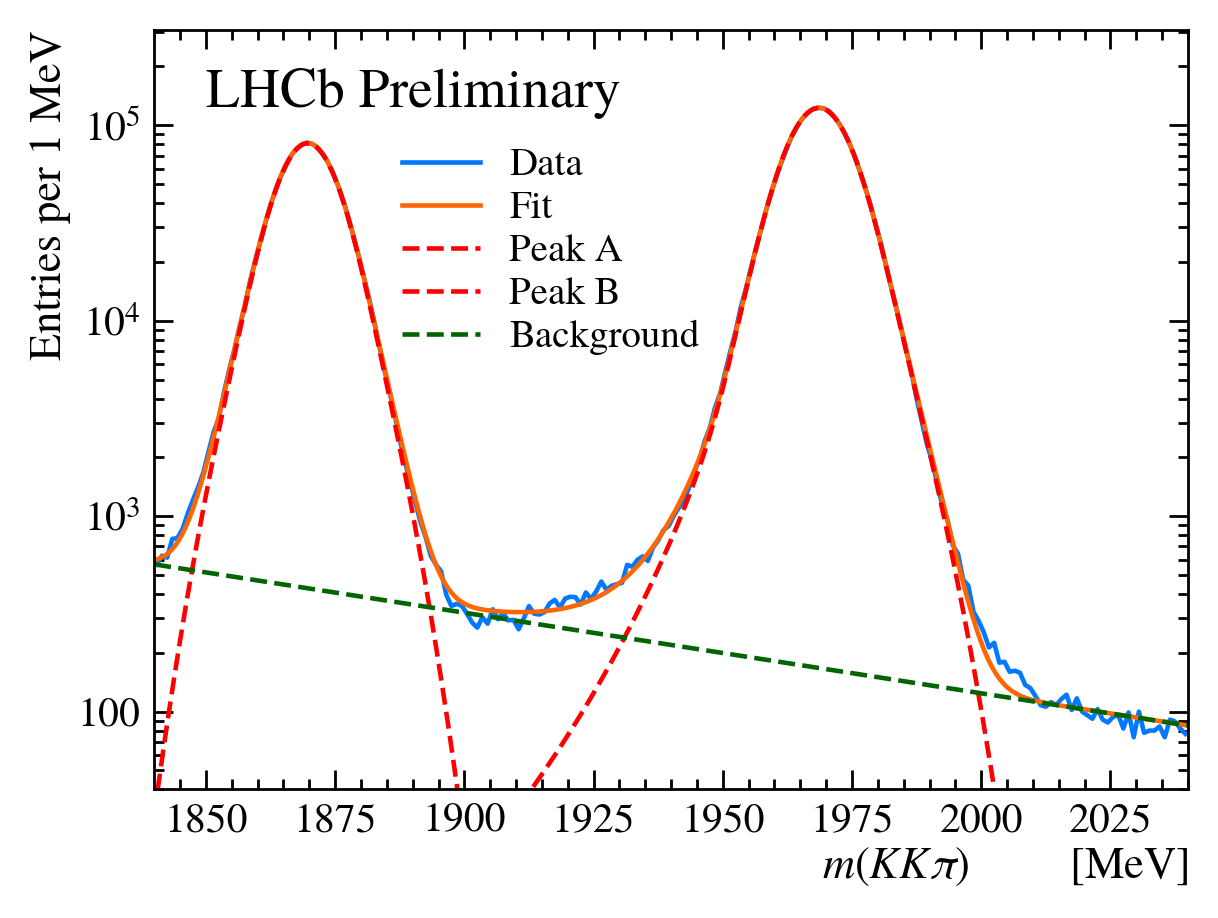

In [126]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(crys1.x,crys1.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,crys1._pdf(x), label='Fit')
plt.plot(x,crys1.pdf[0].call(x)+crys1.pdf[1].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,crys1.pdf[3].call(x)+crys1.pdf[2].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,crys1.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(crys1.y)*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [133]:
crys2 = fitlib.Fitter.binned(Dp_M, range=(1840,2040), bins=200)
crys2.mu2 = fitlib.f(1950,2000)
crys2.mu_diff = fitlib.f(0,100,200)

crys2.pdf=[
    fitlib.Fit_function(lambda x,N,a,n,mu,sigma: N*crystalball_pdf(x,a,n,mu,sigma), [fitlib.f(0,500000,np.inf), fitlib.f(0,5), fitlib.f(0,2,np.inf), crys2.mu2 - crys2.mu_diff, fitlib.f(1,10)]),
    fitlib.Normal(mu = crys2.mu2 - crys2.mu_diff, sigma = fitlib.f(1,20)),
    fitlib.Normal(mu = crys2.mu2 - crys2.mu_diff, sigma = fitlib.f(1,20)),
    
    fitlib.Fit_function(lambda x,N,a,n,mu,sigma: N*crystalball_pdf(x,a,n,mu,sigma), [fitlib.f(0,600000,np.inf), fitlib.f(0,5), fitlib.f(0,2,np.inf), crys2.mu2, fitlib.f(1,10)]),
    fitlib.Normal(mu = crys2.mu2, sigma = fitlib.f(1,20)),
    fitlib.Normal(mu = crys2.mu2, sigma = fitlib.f(1,20)),
    
    fitlib.Exp(n=fitlib.f(0,10000,np.inf), x0=fitlib.f(1840), a=fitlib.f(0.0001,300,np.inf))
]

crys2.chi2(1000000)

/tmp/ipykernel_31824/1056269470.py:4: RuntimeWarning: overflow encountered in scalar power
  A = (n_over_alpha)**n*exp
/tmp/ipykernel_31824/1056269470.py:13: RuntimeWarning: invalid value encountered in multiply
  powerlaw = N*A*(B - (x[~mask]-xbar)/sigma)**-n


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 313.3                      │             Nfcn = 30898             │
│ EDM = 6.28e-06 (Goal: 0.0002)    │           time = 20.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │  3.43e6   │  0.10e6   │            │            │    0    │         │       │
│ 1 │ x1   │   2.373   │   0.012   │            │            │    0    │    5    │       │
│ 2 │ x2   │  1.00136  │  0.00005  │            │            │    0    │         │       │
│ 3 │ x3   │1.968623e3 │0.000005e3 │            │            │  1950   │  2000   │       │
│ 4 │ x4   │  98.940   │   0.008   │            │            │    0    │   200   │       │
│ 5 │ x5   │   4.926   │   0.029   │            │            │    1    │   10    │       │
│ 6 │ x6   │  0.188e6  │  0.011e6  │            │            │    1    │         │       │
│ 7 │ x7   │   9.35    │   0.10    │            │            │    1    │   20    │       │
│ 8 │ x8   │  0.643e6  │  0.012e6  │            │            │    1    │         │       │
│ 9 │ x9   │   6.42    │   0.05    │            │            │    1    │   20    │       │
│ 10│ x10  │  5.66e6   │  0.10e6   │            │            │    0    │         │       │
│ 11│ x11  │   2.432   │   0.007   │            │            │    0    │    5    │       │
│ 12│ x12  │ 1.001596  │ 0.000033  │            │            │    0    │         │       │
│ 13│ x13  │   5.512   │   0.019   │            │            │    1    │   10    │       │
│ 14│ x14  │  1.084e6  │  0.014e6  │            │            │    1    │         │       │
│ 15│ x15  │   7.70    │   0.04    │            │            │    1    │   20    │       │
│ 16│ x16  │   82e3    │    6e3    │            │            │    1    │         │       │
│ 17│ x17  │   13.93   │   0.26    │            │            │    1    │   20    │       │
│ 18│ x18  │  45.3e3   │   1.1e3   │            │            │    0    │         │       │
│ 19│ x19  │  1.840e3  │  0.018e3  │            │            │         │         │  yes  │
│ 20│ x20  │    211    │    13     │            │            │ 0.0001  │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│     │             x0             x1             x2             x3             x4             x5             x6             x7             x8             x9            x10            x11            x12            x13            x14            x15            x16            x17            x18            x19            x20 │
├─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Text(0.05, 0.95, 'LHCb Preliminary')

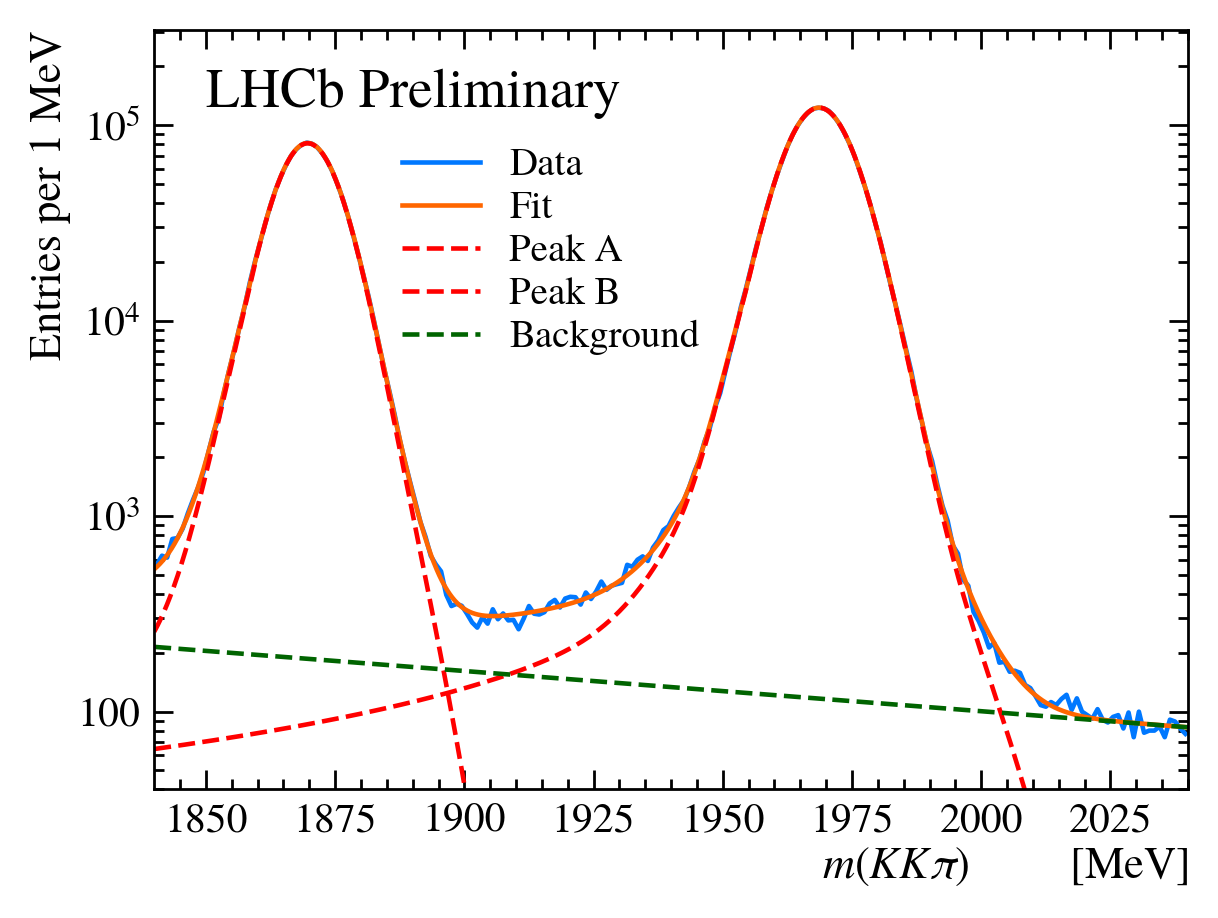

In [134]:
fig,ax = plt.subplots()
plt.yscale('log')
plt.plot(crys2.x,crys2.y, label="Data")
x = np.linspace(1840,2040,5000)
plt.plot(x,crys2._pdf(x), label='Fit')
plt.plot(x,crys2.pdf[0].call(x)+crys2.pdf[1].call(x)+crys2.pdf[2].call(x), label='Peak A', color='red', linestyle='--')
plt.plot(x,crys2.pdf[3].call(x)+crys2.pdf[4].call(x)+crys2.pdf[5].call(x), label='Peak B', color='red', linestyle='--')
plt.plot(x,crys2.pdf[-1].call(x), label='Background', color='darkgreen', linestyle='--')
plt.ylabel('Entries per 1 MeV')
plt.xlabel('$m(K K \pi)$         [MeV]')
plt.axis([1840,2040,40,np.max(crys2.y)*2.5])
plt.legend(bbox_to_anchor = [0.58, 0.5])
plt.text(0.05, 0.95, 'LHCb Preliminary',
     horizontalalignment='left',
     verticalalignment='top',
     transform = ax.transAxes,
        size=40)

In [136]:
conv1.minimizer.fixed

<FixedView x0=False x1=False x2=False x3=False x4=False x5=False x6=False x7=False x8=False x9=False x10=False x11=True x12=False>

In [157]:
conv1.mu_diff.error

77.29291403467535

In [180]:
fits = [conv1, conv2, conv1_2, conv2_2, crys1, crys2]
for fit in fits:
    print(f" & {np.sum(~fit.minimizer.fixed)} & {fit.mu2.value:.3f} ± {fit.mu2.error:.3f} & {fit.mu_diff.value:.3f} ± {fit.mu_diff.error:.3f} & {fit.minimizer.fval/(len(fit.x) - np.sum(~fit.minimizer.fixed)):.1f} \\\\")

 & 12 & 1968.699 ± 0.005 & 98.938 ± 0.008 & 2.8 \\
 & 13 & 1968.698 ± 0.005 & 98.940 ± 0.008 & 2.4 \\
 & 16 & 1968.699 ± 0.005 & 98.938 ± 0.008 & 1.4 \\
 & 17 & 1968.698 ± 0.005 & 98.940 ± 0.008 & 1.3 \\
 & 16 & 1968.600 ± 0.005 & 98.934 ± 0.008 & 3.4 \\
 & 20 & 1968.623 ± 0.005 & 98.940 ± 0.008 & 1.7 \\
